In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Volatility Analysis:


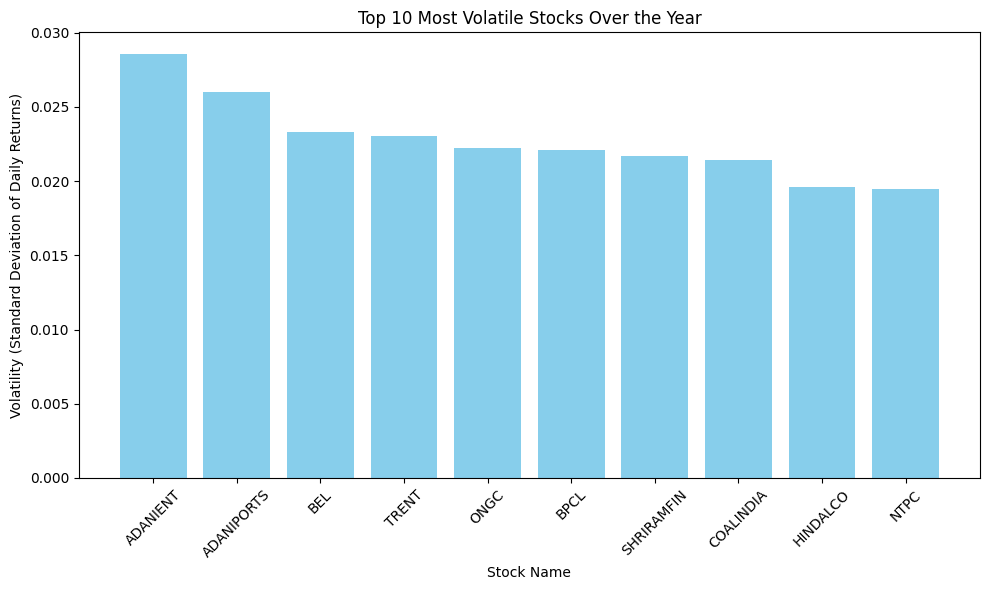

In [3]:
def calculate_volatility(csv_file):
    # Load data from CSV file
    data = pd.read_csv(csv_file)

    # Ensure the data is sorted by StockName and Date
    data['date'] = pd.to_datetime(data['date'])  # Convert Date to datetime
    data = data.sort_values(by=['Ticker', 'date'])

    # Calculate daily returns
    data['DailyReturn'] = data.groupby('Ticker')['close'].pct_change()

    # Compute standard deviation of daily returns (volatility) for each stock
    volatility = data.groupby('Ticker')['DailyReturn'].std().reset_index()
    volatility.columns = ['StockName', 'Volatility']

    # Get the top 10 most volatile stocks
    top_volatile_stocks = volatility.sort_values(by='Volatility', ascending=False).head(10)

    return data, top_volatile_stocks

def plot_volatility(top_volatile_stocks):
    # Plot a bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(top_volatile_stocks['StockName'], top_volatile_stocks['Volatility'], color='skyblue')
    plt.title('Top 10 Most Volatile Stocks Over the Year')
    plt.xlabel('Stock Name')
    plt.ylabel('Volatility (Standard Deviation of Daily Returns)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example Usage
csv_file = 'combined_data.csv'  # Replace with the path to your CSV file

# Analyze Volatility
df, top_volatile_stocks = calculate_volatility(csv_file)

# Plot Results
plot_volatility(top_volatile_stocks)



In [7]:
# Save to CSV or display
#top_volatile_stocks.to_csv('top_volatile_stocks.csv', index=False)
print(top_volatile_stocks)

     StockName  Volatility
0     ADANIENT    0.028601
1   ADANIPORTS    0.026029
8          BEL    0.023283
47       TRENT    0.023074
34        ONGC    0.022247
10        BPCL    0.022069
39  SHRIRAMFIN    0.021687
13   COALINDIA    0.021411
21    HINDALCO    0.019587
33        NTPC    0.019475


 2. Cumulative Return Over Time:

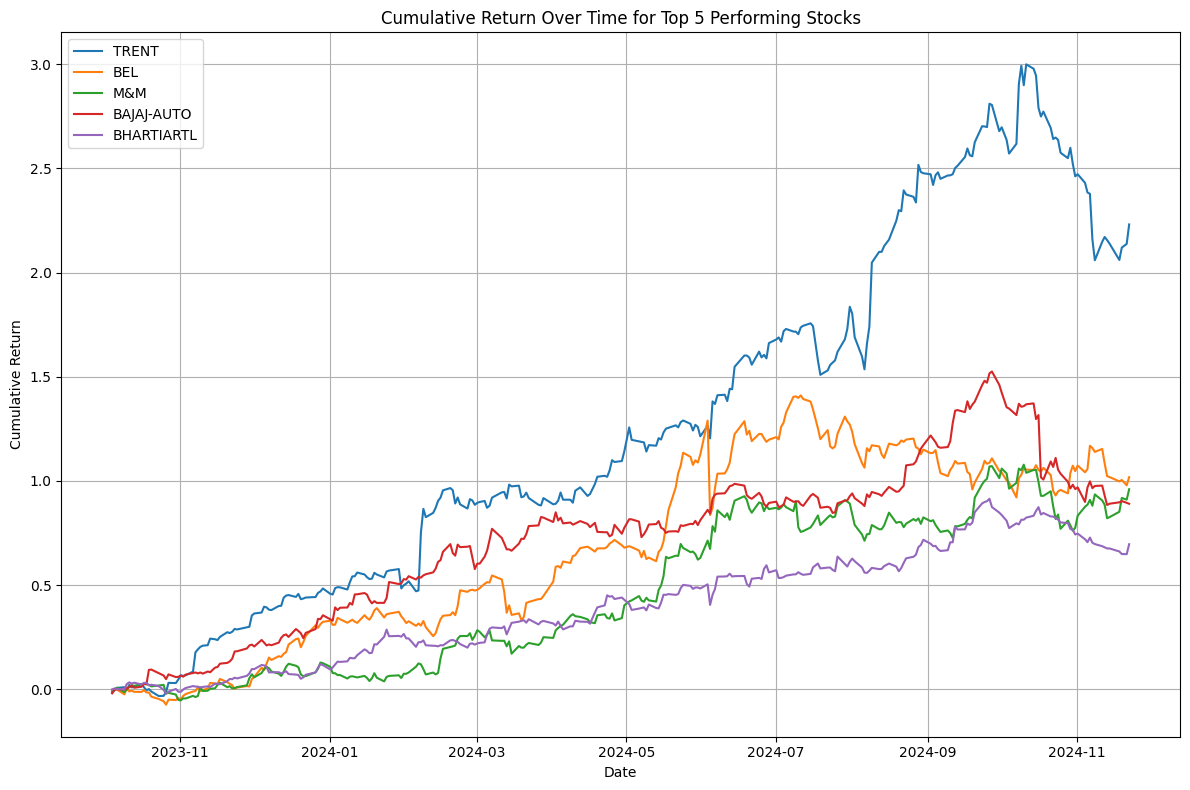

           Ticker    close                date    high      low    month  \
49     BAJAJ-AUTO  5016.45 2023-10-03 05:30:00  5073.0  4997.10  2023-10   
99     BAJAJ-AUTO  4918.60 2023-10-04 05:30:00  5019.2  4903.05  2023-10   
149    BAJAJ-AUTO  5011.05 2023-10-05 05:30:00  5039.3  4925.10  2023-10   
199    BAJAJ-AUTO  5014.60 2023-10-06 05:30:00  5120.0  4997.50  2023-10   
249    BAJAJ-AUTO  5007.30 2023-10-09 05:30:00  5068.7  4957.05  2023-10   
...           ...      ...                 ...     ...      ...      ...   
13963       TRENT  6463.00 2024-11-14 05:30:00  6550.3  6367.05  2024-11   
14013       TRENT  6301.65 2024-11-18 05:30:00  6453.0  6275.00  2024-11   
14063       TRENT  6423.85 2024-11-19 05:30:00  6579.9  6359.80  2024-11   
14113       TRENT  6460.45 2024-11-21 05:30:00  6519.0  6346.20  2024-11   
14163       TRENT  6652.80 2024-11-22 05:30:00  6678.0  6430.00  2024-11   

          open   volume  DailyReturn  CumulativeReturn  
49     5065.00   464531       

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

def calculate_cumulative_return(csv_file):
    # Load data from CSV
    data = pd.read_csv(csv_file)

    # Ensure the data is sorted by Ticker and date
    data['date'] = pd.to_datetime(data['date'])  # Convert date to datetime
    data = data.sort_values(by=['Ticker', 'date'])

    # Calculate daily returns
    data['DailyReturn'] = data.groupby('Ticker')['close'].pct_change()

    # Calculate cumulative return for each stock
    data['CumulativeReturn'] = data.groupby('Ticker')['DailyReturn'].transform(lambda x: (1 + x).cumprod() - 1)

    # Calculate cumulative return at the end of the year for ranking
    final_cumulative_return = data.groupby('Ticker').last().reset_index()
    top_stocks = final_cumulative_return.nlargest(5, 'CumulativeReturn')[['Ticker', 'CumulativeReturn']]
    top_stocks.columns = ['StockName', 'CumulativeReturn']

    return data, top_stocks

def plot_cumulative_return(data, top_stocks):
    plt.figure(figsize=(12, 8))
    
    for stock in top_stocks['StockName']:
        stock_data = data[data['Ticker'] == stock]
        plt.plot(stock_data['date'], stock_data['CumulativeReturn'], label=stock)
    
    plt.title('Cumulative Return Over Time for Top 5 Performing Stocks')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    plt.show()    

# Example Usage
csv_file = 'combined_data.csv'  # Replace with the path to your CSV file

# Calculate and plot cumulative returns
data, top_stocks = calculate_cumulative_return(csv_file)
plot_cumulative_return(data, top_stocks)


# Save to CSV or display
st_data = data[data['Ticker'].isin(['TRENT', 'BEL', 'M&M', 'BAJAJ-AUTO', 'BHARTIARTL'])]
st_data.to_csv('top_cumulative_stocks.csv', index=False)
print(st_data)


In [29]:
#Inspect the Columns of both files
stock_data = pd.read_csv('combined_data.csv')
sector_data = pd.read_csv('Sector_data - Sheet1.csv')

print("Unique Tickers in stock_csv:", stock_data['Ticker'].unique())
print("Unique Symbols in sector_csv:", sector_data['Symbol'].unique())

Unique Tickers in stock_csv: ['SBIN' 'BAJFINANCE' 'TITAN' 'ITC' 'TCS' 'LT' 'TATACONSUM' 'RELIANCE'
 'HCLTECH' 'JSWSTEEL' 'ULTRACEMCO' 'POWERGRID' 'INFY' 'TRENT' 'BHARTIARTL'
 'TATAMOTORS' 'WIPRO' 'TECHM' 'NTPC' 'HINDUNILVR' 'APOLLOHOSP' 'M&M'
 'GRASIM' 'ICICIBANK' 'ADANIENT' 'ADANIPORTS' 'BEL' 'BAJAJFINSV'
 'EICHERMOT' 'COALINDIA' 'MARUTI' 'INDUSINDBK' 'ASIANPAINT' 'TATASTEEL'
 'HDFCLIFE' 'DRREDDY' 'SUNPHARMA' 'KOTAKBANK' 'SHRIRAMFIN' 'NESTLEIND'
 'ONGC' 'CIPLA' 'BPCL' 'BRITANNIA' 'SBILIFE' 'HINDALCO' 'HEROMOTOCO'
 'AXISBANK' 'HDFCBANK' 'BAJAJ-AUTO']
Unique Symbols in sector_csv: ['ADANI ENTERPRISES: ADANIGREEN' 'ADANI PORTS & SEZ: ADANIPORTS'
 'APOLLO HOSPITALS: APOLLOHOSP' 'ASIAN PAINTS: ASIANPAINT'
 'AXIS BANK: AXISBANK' 'BAJAJ AUTO: BAJAJ-AUTO'
 'BAJAJ FINANCE: BAJFINANCE' 'BAJAJ FINSERV: BAJAJFINSV'
 'BHARAT ELECTRONICS: BEL' 'BHARTI AIRTEL: AIRTEL' 'BPCL: BPCL'
 'CIPLA: CIPLA' 'COAL INDIA: COALINDIA' 'DR. REDDYS LAB: DRREDDY'
 'EICHER MOTORS: EICHERMOT' 'GRASIM: GRASIM' 'HCL TECH

3. Sector-wise Performance:

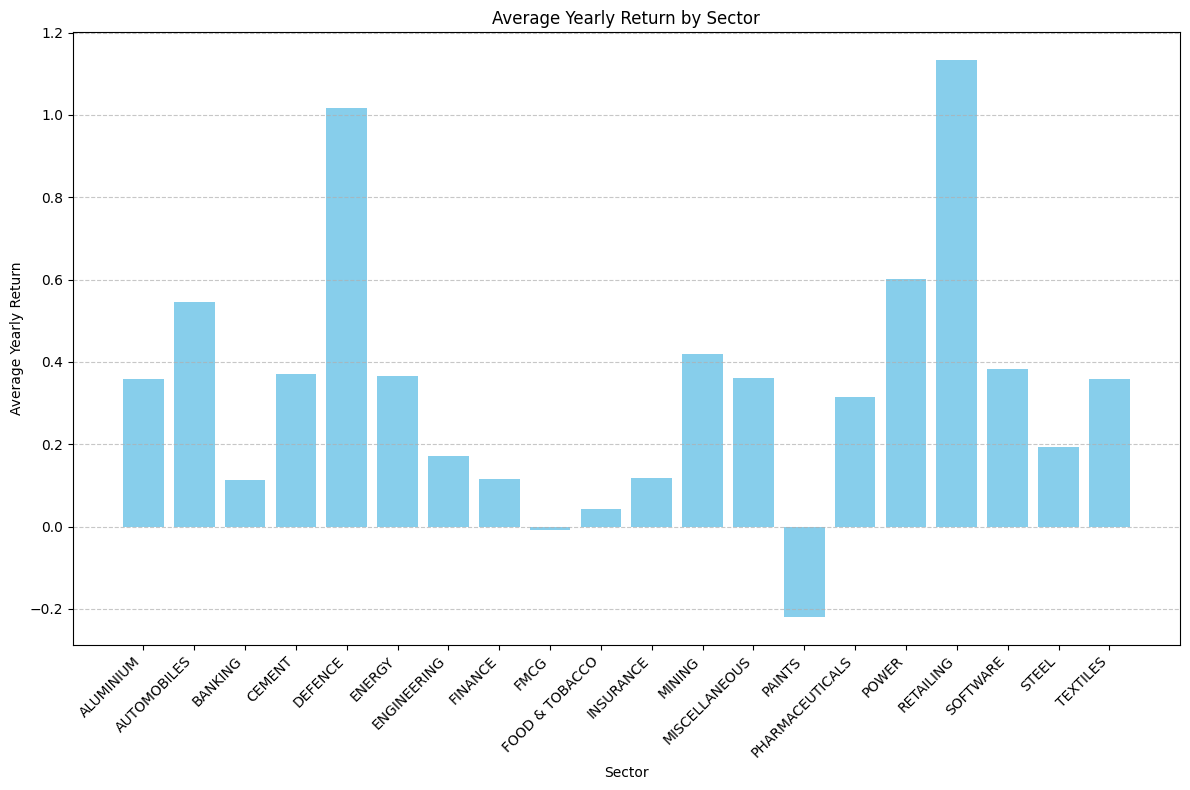

             sector  CumulativeReturn
0         ALUMINIUM          0.358683
1       AUTOMOBILES          0.545265
2           BANKING          0.113805
3            CEMENT          0.369709
4           DEFENCE          1.017601
5            ENERGY          0.365648
6       ENGINEERING          0.172537
7           FINANCE          0.115761
8              FMCG         -0.009579
9    FOOD & TOBACCO          0.043217
10        INSURANCE          0.117678
11           MINING          0.418465
12    MISCELLANEOUS          0.361031
13           PAINTS         -0.219350
14  PHARMACEUTICALS          0.313792
15            POWER          0.601841
16        RETAILING          1.133054
17         SOFTWARE          0.382760
18            STEEL          0.192171
19         TEXTILES          0.357820


In [35]:
def sector_performance(stock_csv, sector_csv):
    # Load stock and sector data
    stock_data = pd.read_csv(stock_csv)
    sector_data = pd.read_csv(sector_csv)

    # Clean and standardize Ticker column
    stock_data['Ticker'] = stock_data['Ticker'].str.upper().str.strip()

    # Extract and clean Ticker from Symbol column in sector data
    sector_data['CleanSymbol'] = sector_data['Symbol'].apply(lambda x: x.split(':')[-1].strip().upper())

    # Merge stock data with sector data using Ticker and CleanSymbol
    merged_data = pd.merge(stock_data, sector_data, left_on='Ticker', right_on='CleanSymbol', how='left')

    if merged_data.empty:
        raise ValueError("Merged data is empty. Please check the cleaning steps and ensure alignment.")

    # Calculate daily returns
    merged_data['DailyReturn'] = merged_data.groupby('Ticker')['close'].pct_change()

    # Calculate cumulative return for each stock
    merged_data['CumulativeReturn'] = merged_data.groupby('Ticker')['DailyReturn'].transform(lambda x: (1 + x).cumprod() - 1)

    # Calculate yearly return for each stock
    final_returns = merged_data.groupby('Ticker').last().reset_index()
    final_returns = final_returns[['Ticker', 'sector', 'CumulativeReturn']]

    # Calculate average performance for each sector
    sector_performance = final_returns.groupby('sector')['CumulativeReturn'].mean().reset_index()

    # Plot sector performance
    plt.figure(figsize=(12, 8))
    plt.bar(sector_performance['sector'], sector_performance['CumulativeReturn'], color='skyblue')
    plt.title('Average Yearly Return by Sector')
    plt.xlabel('Sector')
    plt.ylabel('Average Yearly Return')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    return sector_performance

# Example Usage
stock_csv = 'combined_data.csv'  # Replace with your stock data file
sector_csv = 'Sector_data - Sheet1.csv'       # Replace with your sector mapping file
sector_performance_df = sector_performance(stock_csv, sector_csv)

# Save to CSV or display
sector_performance_df.to_csv('sector_performance.csv', index=False)
print(sector_performance_df)



4. Stock Price Correlation:


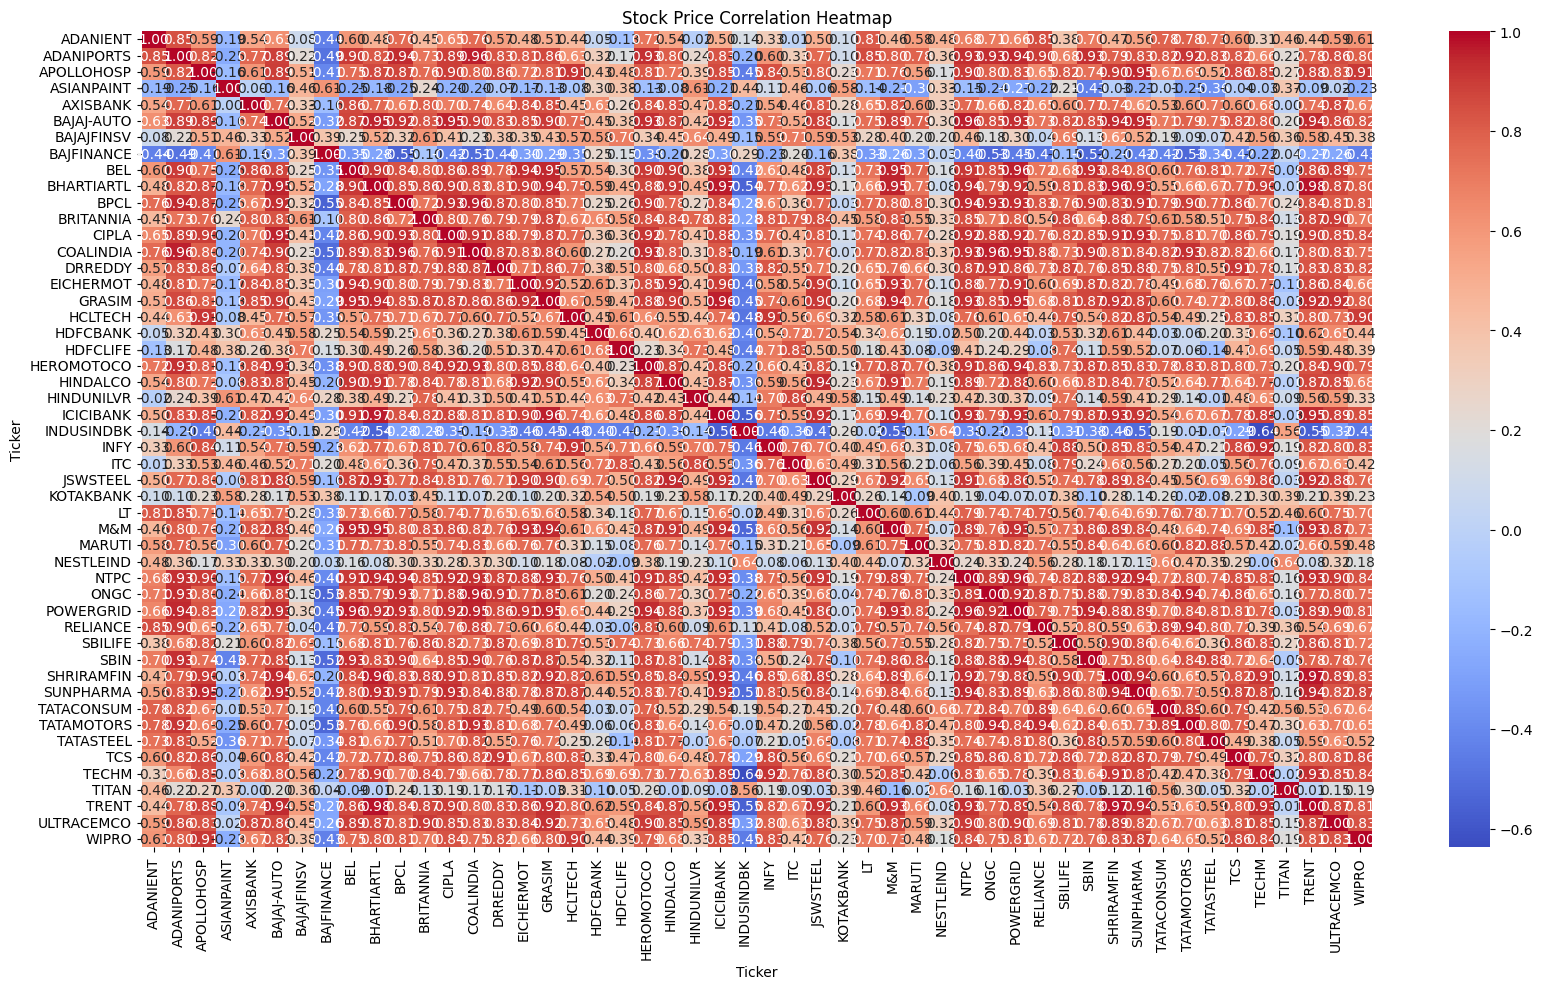

Ticker      ADANIENT  ADANIPORTS  APOLLOHOSP  ASIANPAINT  AXISBANK  \
Ticker                                                               
ADANIENT    1.000000    0.845806    0.594807   -0.186479  0.537048   
ADANIPORTS  0.845806    1.000000    0.815085   -0.246520  0.770207   
APOLLOHOSP  0.594807    0.815085    1.000000   -0.157872  0.607392   
ASIANPAINT -0.186479   -0.246520   -0.157872    1.000000  0.000971   
AXISBANK    0.537048    0.770207    0.607392    0.000971  1.000000   
BAJAJ-AUTO  0.634551    0.887718    0.893753   -0.162563  0.742850   
BAJAJFINSV  0.080113    0.215085    0.509150    0.463444  0.334558   
BAJFINANCE -0.437309   -0.486128   -0.410892    0.609427 -0.155250   
BEL         0.597634    0.900377    0.752139   -0.246263  0.863011   
BHARTIARTL  0.482298    0.819970    0.865525   -0.178033  0.767627   
BPCL        0.759587    0.941068    0.872684   -0.252440  0.674180   
BRITANNIA   0.447274    0.729383    0.761880    0.244528  0.795817   
CIPLA       0.654769

In [22]:
def stock_price_correlation(csv_file):
    # Load the stock data
    stock_data = pd.read_csv(csv_file)
    stock_data['date'] = pd.to_datetime(stock_data['date'])  # Ensure dates are in datetime format
    stock_data = stock_data.drop_duplicates(subset=['date', 'Ticker'])
    # Pivot the data to create a DataFrame where each column is a stock's closing prices
    pivot_data = stock_data.pivot_table(index='date', columns='Ticker', values='close', aggfunc='mean')

    # Calculate the correlation matrix
    correlation_matrix = pivot_data.corr()

    # Plot the heatmap
    plt.figure(figsize=(17, 10))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
    plt.title('Stock Price Correlation Heatmap')
    plt.tight_layout()
    plt.show()

    return correlation_matrix

# Example Usage
csv_file = 'combined_data.csv'  # Replace with your stock data file

correlation_matrix = stock_price_correlation(csv_file)
print(correlation_matrix)

# Save to CSV or display
correlation_matrix.to_csv('correlation_matrix.csv')


5. Top 5 Gainers and Losers (Month-wise):

C:\Users\artik\AppData\Local\Temp\ipykernel_14908\1894783034.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\artik\AppData\Local\Temp\ipykernel_14908\1894783034.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\artik\AppData\Local\Temp\ipykernel_14908\1894783034.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\artik\AppData\Local\Temp\ipykernel_14908\1894783034.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `h

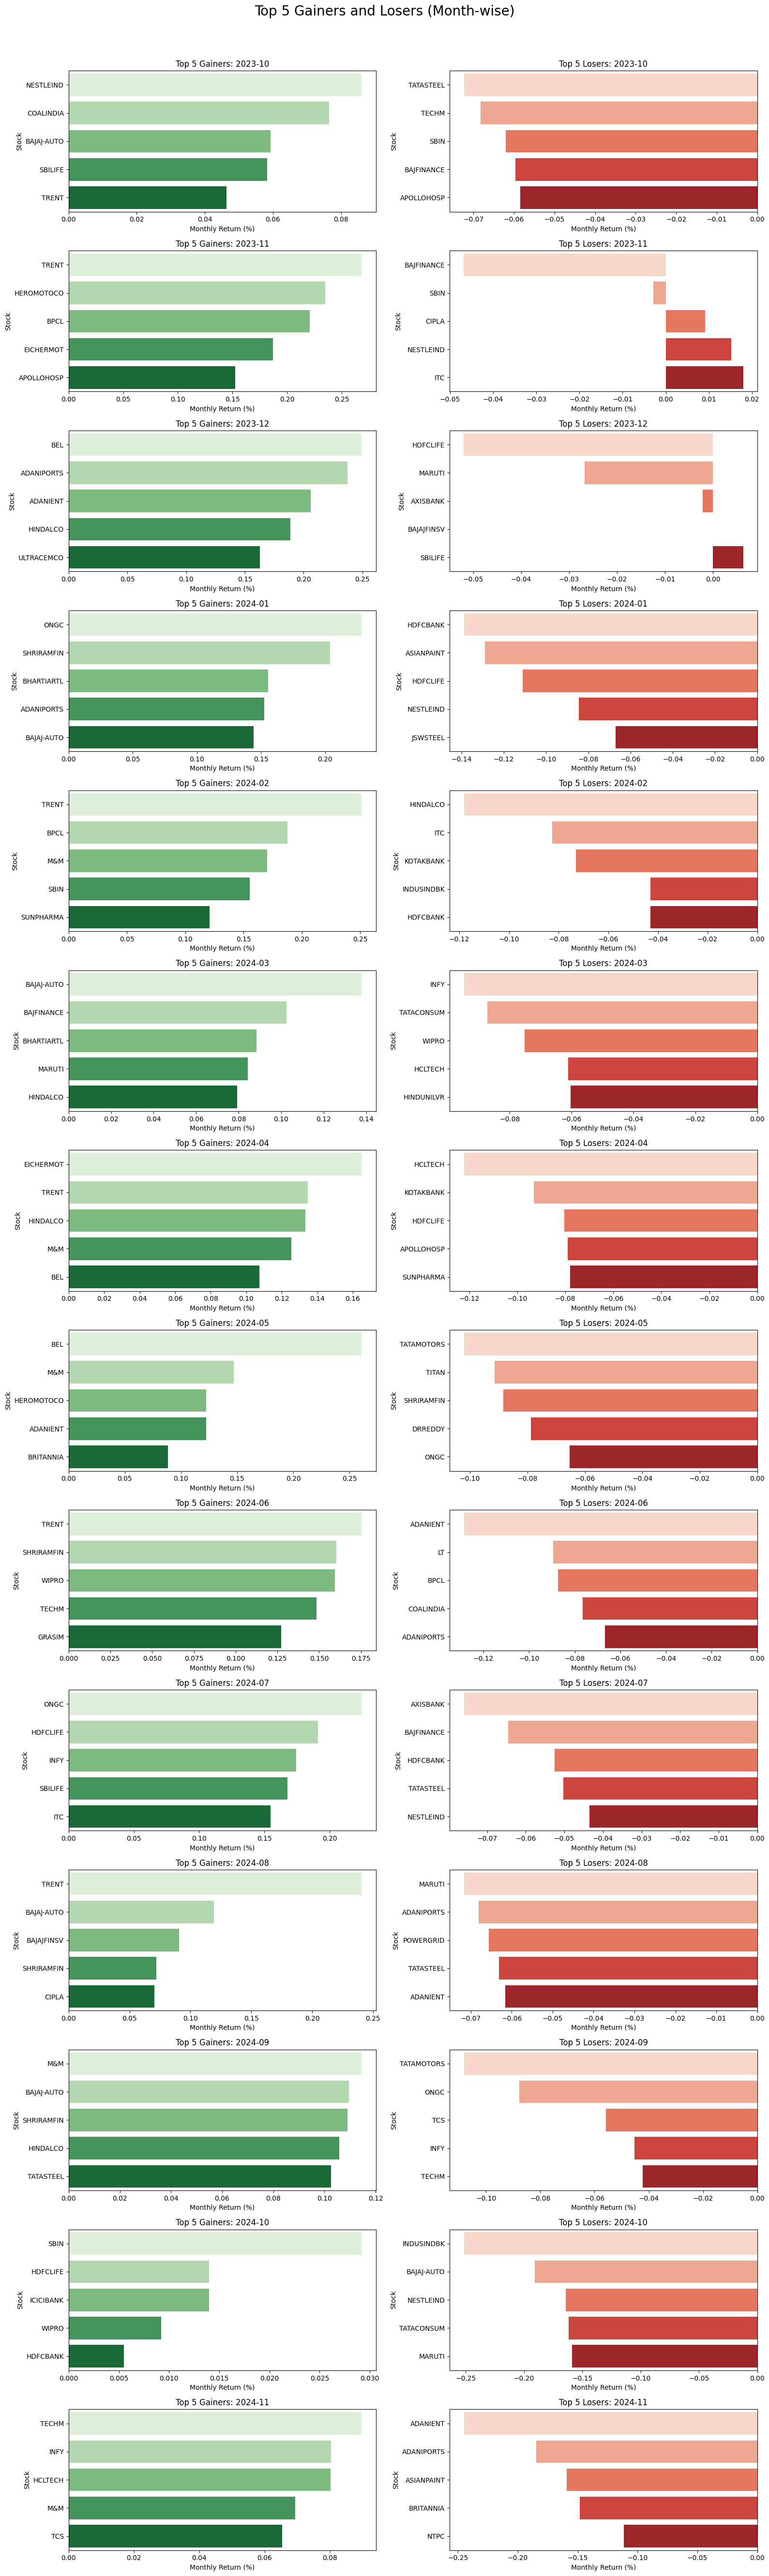

Top Gainers:
        Ticker    close                date     high      low    month  \
0    NESTLEIND  2423.48 2023-10-31 05:30:00  2433.00  2412.21  2023-10   
1    COALINDIA   314.25 2023-10-31 05:30:00   316.80   310.75  2023-10   
2   BAJAJ-AUTO  5314.05 2023-10-31 05:30:00  5366.15  5292.60  2023-10   
3      SBILIFE  1367.85 2023-10-31 05:30:00  1375.40  1319.50  2023-10   
4        TRENT  2154.70 2023-10-31 05:30:00  2165.00  2119.10  2023-10   
..         ...      ...                 ...      ...      ...      ...   
65       TECHM  1747.45 2024-11-22 05:30:00  1749.85  1702.25  2024-11   
66        INFY  1902.25 2024-11-22 05:30:00  1914.05  1834.00  2024-11   
67     HCLTECH  1898.40 2024-11-22 05:30:00  1902.00  1836.50  2024-11   
68         M&M  3012.95 2024-11-22 05:30:00  3063.50  2896.70  2024-11   
69         TCS  4244.60 2024-11-22 05:30:00  4254.95  4054.00  2024-11   

       open   volume YearMonth  MonthlyReturn  
0   2430.00   516390   2023-10       0.086022  
1 

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def top_gainers_losers_monthly(csv_file):
    # Load the stock data
    stock_data = pd.read_csv(csv_file)
    stock_data['date'] = pd.to_datetime(stock_data['date'])  # Ensure dates are in datetime format

    # Extract month and year from the date column
    stock_data['YearMonth'] = stock_data['date'].dt.to_period('M')

    # Group by Ticker and YearMonth, calculate monthly returns
    stock_data['MonthlyReturn'] = stock_data.groupby(['Ticker', 'YearMonth'])['close'].transform(
        lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0]
    )

    # Drop duplicate entries within each month for clean analysis
    monthly_data = stock_data.drop_duplicates(subset=['Ticker', 'YearMonth'], keep='last')

    # Get unique months
    months = monthly_data['YearMonth'].drop_duplicates().sort_values()

    # Prepare the figure dynamically based on the number of months
    n_months = len(months)
    fig, axes = plt.subplots(n_months, 2, figsize=(16, 4 * n_months))
    fig.suptitle('Top 5 Gainers and Losers (Month-wise)', fontsize=20)

    # Adjust axes for single month
    if n_months == 1:
        axes = [axes]

    gainers = pd.DataFrame()
    losers = pd.DataFrame()

    for i, month in enumerate(months):
        # Filter data for the current month
        month_data = monthly_data[monthly_data['YearMonth'] == month]

        # Identify top 5 gainers and losers
        top_gainers = month_data.nlargest(5, 'MonthlyReturn')
        top_losers = month_data.nsmallest(5, 'MonthlyReturn')

        # Concatenate results
        gainers = pd.concat([gainers, top_gainers], ignore_index=True)
        losers = pd.concat([losers, top_losers], ignore_index=True)

        # Plot gainers
        sns.barplot(
            ax=axes[i][0] if n_months > 1 else axes[0],
            data=top_gainers,
            x='MonthlyReturn',
            y='Ticker',
            palette='Greens'
        )
        axes[i][0 if n_months > 1 else 0].set_title(f'Top 5 Gainers: {month}')
        axes[i][0 if n_months > 1 else 0].set_xlabel('Monthly Return (%)')
        axes[i][0 if n_months > 1 else 0].set_ylabel('Stock')

        # Plot losers
        sns.barplot(
            ax=axes[i][1] if n_months > 1 else axes[1],
            data=top_losers,
            x='MonthlyReturn',
            y='Ticker',
            palette='Reds'
        )
        axes[i][1 if n_months > 1 else 1].set_title(f'Top 5 Losers: {month}')
        axes[i][1 if n_months > 1 else 1].set_xlabel('Monthly Return (%)')
        axes[i][1 if n_months > 1 else 1].set_ylabel('Stock')

    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    plt.show()

    return gainers, losers

# Example Usage
csv_file = 'combined_data.csv'  # Replace with your stock data file
gainers, losers = top_gainers_losers_monthly(csv_file)
gainers.to_csv('top_gainers.csv', index=False)
losers.to_csv('top_losers.csv', index=False)    
# Display results
print("Top Gainers:")
print(gainers)
print("\nTop Losers:")
print(losers)
